<a href="https://colab.research.google.com/github/LongC24/UVM_CS254_HW/blob/main/Lichao_Yang_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5


In this assignment you are asked to build decision tree and random forest classifiers on the popular MNIST dataset. You will use the built-in functions in sklearn else you asked otherwise.  

In [1]:
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Part 0: Prepare the data

#### Q1) SKLearn's load_digits()
- Use load_digits from sklearn to load the dataset. 
- You will be using this data for the entire assignment

In [2]:
datadigits = datasets.load_digits()

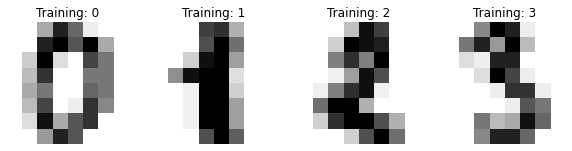

In [3]:
# test function for your load data load.  
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, datadigits.images, datadigits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

#### Q2) Train test split
- We need to split our data into two groups in order to validate model performance and generalization ability 
- Use the sklearn train_test_split function to obtain training data and testing data
- Important: you must use a test size of 0.25 and a random_state of 0

In [4]:
x_train, x_test, y_train, y_test = train_test_split(datadigits.data, datadigits.target, test_size=0.25, random_state=0)


In [5]:
# Test function for your data split. It should match this cell outputs.
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (1347, 64) y: (1347,)
Testing x: (450, 64) y: (450,)


## Part 1: Trees

#### Q3) Build an decision tree classifier
- Create a DecisionTreeClassifier object using sklearn. set random_state=0.
- Call the .fit() function to train your model
- Call the .score() function to assess model accuracy
- Print your accuracy.

In [6]:
# The output should be ~ 0.8377
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
print("accuracy: ", clf.score(x_test, y_test))

accuracy:  0.86


#### Q4) Search for max_features
- Create a for loop iterating though all possible values for the hyperparameter max_features
- Create a tree with max_features = i for each value within your loop
- Fit and score each tree
- Save these scores to some list structure.

In [7]:
scores = []
for i in range(1, x_train.shape[1]):
  clf_maxFeature = DecisionTreeClassifier(max_features=i)
  clf_maxFeature.fit(x_train, y_train)
  scores.append(clf_maxFeature.score(x_test, y_test))

#### Q5) Plot of scores
- Create a graph plotting y=scores from the above question( Use any visualization that you think makes sense)
- Briefly explain max_features in the context of your graph

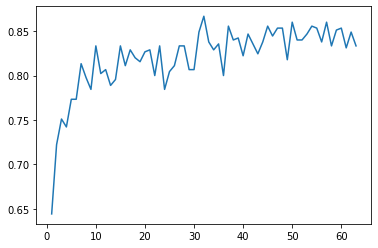

In [8]:
# it should look like the grpah below.

plt.plot(np.arange(1, x_train.shape[1], dtype=int), scores)

plt.show()

## Part 2: Forests

#### Q6) Build an random forest classification model
- Create a RandomForestClassifier object
- Call the .fit() function to train your model
- Call the .score() function to assess model accuracy
- Print your accuracy

In [9]:
# add your code here.
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
print("Accuracy: ", clf_rf.score( x_test, y_test))

Accuracy:  0.9777777777777777


#### Q7) The n_estimators hyperparameter
- Write a for loop to iterate through many different sizes of trees (using the n_estimators hyperparameter).
- Try n_estimators from 10 to 300.
- Why the output might be different everytime your run RandomForestClassifier?
- Graph and report/comment your findings

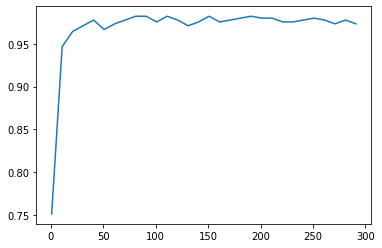

In [10]:
# add your code here, the output should look the graph below (it will be different everytime you run it).
plot_rf = []
for i in range(1, 301,10):
  clf_estimatores = RandomForestClassifier(n_estimators=i)
  clf_estimatores.fit(x_train, y_train)
  plot_rf.append(clf_estimatores.score(x_test, y_test))
#print(plot_rf)
plt.plot(np.arange(1, 301, 10, dtype=int), plot_rf)
plt.show()


## Graduate Student's Problem
(Or extra credit for undergraduates)

#### Q1) MNIST baseline model
- Refer to https://www.tensorflow.org/install to install tensorflow.
- Load the mnist dataset from the keras datasets library (or find the dataset online and import it with your method of choice).
- Transform the shape of your input data from (len(data), 28, 28) to (len(data), 28 * 28) (This step may already be taken care of)
- Create a RandomForestClassifier, train on your training data, and obtain an accuracy score with your test data.

In [11]:
#refer to https://www.tensorflow.org/install to install tensorflow

import tensorflow as tf

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] ** 2)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] ** 2)

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
# add your code here ...
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)
clf_rf2 = RandomForestClassifier().fit(x_train, y_train)
print(clf_rf2.score(x_test, y_test))


0.9708


#### Q2) Create a "Forest" of DecisionTreeClassifiers
- In this question we want to create Forest of DecisionTreeClassifiers by varying the training dataset for each tree and the features at every split. Remember that we don't want to prune the Decision Tree classifiers.
- The default values for the DecisionTreeClassifiers parameters controlling the size of the trees (e.g. min_samples_leaf, etc.) lead to fully grown and unpruned trees.
- To memic a random forest classifier, use the Decision trees with max_features set to 'auto', “sqrt” or “log2”. So at every split just few number of features are used for splitting.
- Create a list of n DecisionTreeClassifier objects, where n is the same number of trees as your RandomForestClassifier above. store those in forest variable to be used in the next cell. 
- Loop through your forest and train all of your trees individually.

In [14]:
# add your code here.
#forest = # should be a list that include all Decision Tree Classifiers
forest = []
for n in range(clf_rf2.n_estimators + 1):
  forest.append(DecisionTreeClassifier(max_features="auto"))
for tree in forest:
  tree.fit(x_train, y_train)

This is a test function that get predictions from all trees for each data point. Uses ensembles of predictions to create singular predictions for each data point and obtain an accuracy and compare with your baseline model accuracy (should be similar, but not necessarily the same as what you the RandomForest classifier implemented in Part2 - 1.

In [15]:

ensemble_predictions = np.array([tree.predict(x_test) for tree in forest]).T

encoded_predictions = np.array([np.bincount(ensemble_predictions[i], minlength=10) for i in range(len(ensemble_predictions))])

predictions = [np.argmax(encoded_predictions[i]) for i in range(len(encoded_predictions))]

In [16]:
print("Acc:", np.sum(predictions == y_test) / len(y_test))

Acc: 0.9721
